In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [2]:
#read the data
path = "../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv"
df = pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#statistical information
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
#info about attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### From the above info, we can observe that some of the columns have missing values, like Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.

In [5]:
#lets see how many values are missing in each column.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#replace numerical attribute missinng value with mean value.
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))
df['Credit_History']=df['Credit_History'].fillna(np.mean(df['Credit_History']))

In [7]:
#replace categorical attributes missing value with most frequent value i.e mode.
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
#check if columns still have any null values.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#we can combine 2 columns, applicant income and coapplicant income into one as total_income.
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

## Visualize the frquency of unique values in categorical valued column.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

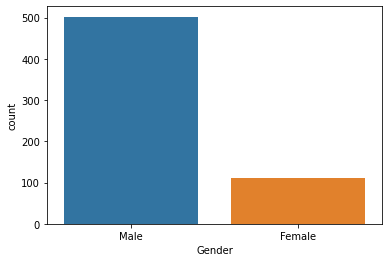

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#countplot is generally used for categorical data.
sns.countplot(df['Gender'])

#### out of 600 loan applicants, 100 are female and 500 are male.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Married', ylabel='count'>

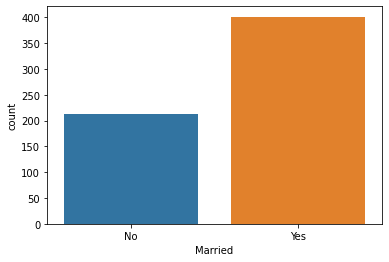

In [11]:
sns.countplot(df['Married'])

#### out of 600 loan applicants, 400 are married and 200 are unmarried.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education', ylabel='count'>

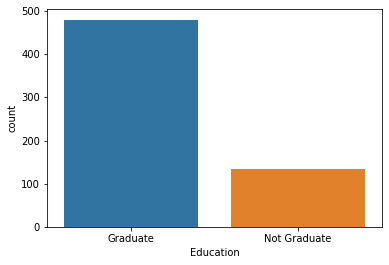

In [12]:
#? what is dependents and self.employed.
sns.countplot(df['Education'])

#### out of 600 loan applicants, 150 are not graduated while 450 are graduated.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

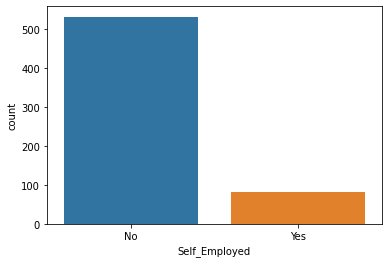

In [13]:
sns.countplot(df['Self_Employed'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

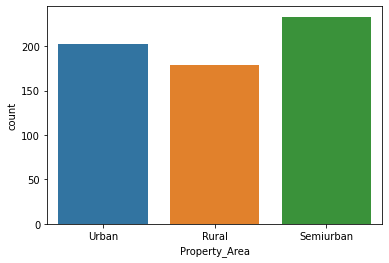

In [14]:
sns.countplot(df['Property_Area'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dependents', ylabel='count'>

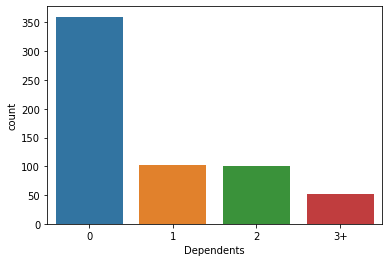

In [15]:
sns.countplot(df['Dependents'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

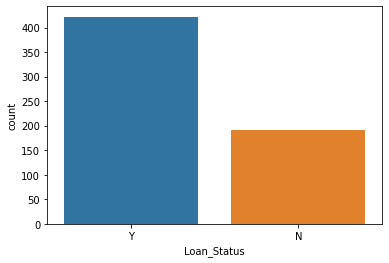

In [16]:
sns.countplot(df['Loan_Status'])

#### This graph tells us , that out of 600 people, almost 400 have paid their loan, while only alomst 200 have not paid their loan.

#### Loan Applicants are almost equally from urban area, rural area and semiurban area.

#### out of 600 loan applicants, 70 are self-employed while 530 are employed.

## Visualize the numerical data.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

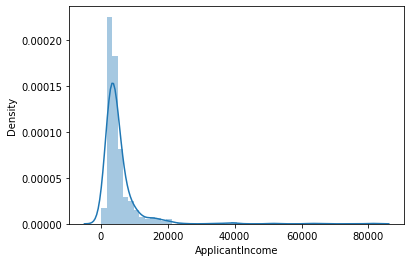

In [17]:
#use distplot for distribution of the data
sns.distplot(df['ApplicantIncome'])

#### The graph above seems skewed towards left side, so we need to distribute equally along the range to work well for the model, so we will apply log transformation on the data to normalize the data.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

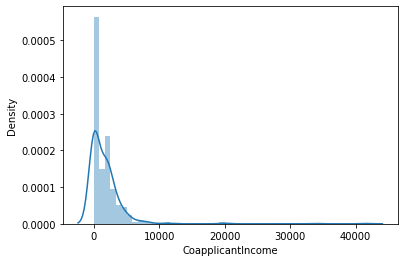

In [18]:
sns.distplot(df['CoapplicantIncome'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

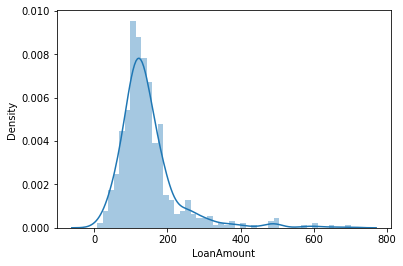

In [19]:
#use distplot for distribution of the data
sns.distplot(df['LoanAmount'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

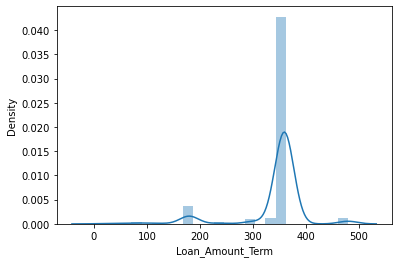

In [20]:
#use distplot for distribution of the data
sns.distplot(df['Loan_Amount_Term'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

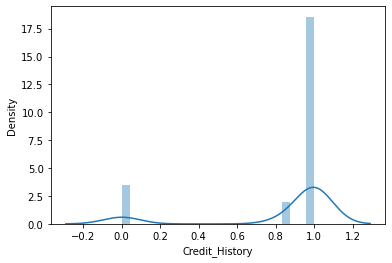

In [21]:
#use distplot for distribution of the data
sns.distplot(df['Credit_History'])

#### from the above distribution graphs, none seems equally distributed, everyone is somewhat skewed, so we need to normalize the data with log data.

#### Instead, we will make additional columns i.e call log columns of correspondng columns to be normalized.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_income', ylabel='Density'>

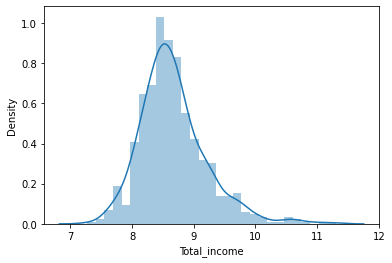

In [22]:
#lets check distribution of data in newly added  column Total_Income
df['Total_income'] = np.log(df['Total_income'])
sns.distplot(df['Total_income'])

#### Now total_income is evenly distributed.

In [23]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome_log']=np.log(df['CoapplicantIncome'])
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,8.674026,-inf,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.714568,8.430109,7.318540,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,8.006368,-inf,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,8.505323,7.856707,7.765569,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,8.699515,-inf,4.948760,5.886104


## Correlation Matrix

<AxesSubplot:>

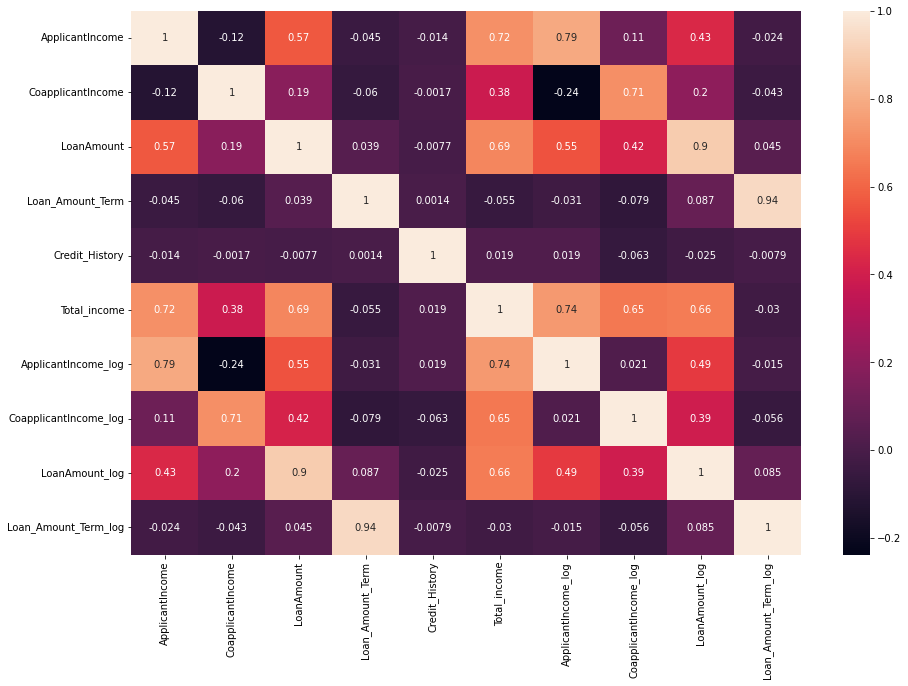

In [25]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

#### we will keep the log terms and drop all the corresponding columns.

In [26]:
# we will drop un-necessary columns,
# 2 attributes with high corelation between each other is like having simitlar attributes,
#so we can drop one of it
#coapplicant Income_log has inf as a value, so we are dropping this column also.
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID','CoapplicantIncome_log']
df = df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,8.699515,4.948760,5.886104


In [27]:
# Convert Categorical Data into Numerical Data.
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df.head()
'''

"\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndf['Gender'] = le.fit_transform(df['Gender'])\ndf['Married'] = le.fit_transform(df['Married'])\ndf['Education'] = le.fit_transform(df['Education'])\ndf['Self_Employed'] = le.fit_transform(df['Self_Employed'])\ndf['Property_Area'] = le.fit_transform(df['Property_Area'])\ndf['Loan_Status'] = le.fit_transform(df['Loan_Status'])\ndf['Loan_Status'] = le.fit_transform(df['Loan_Status'])\ndf['Dependents'] = le.fit_transform(df['Dependents'])\ndf.head()\n"

In [28]:
#lets make a function to transform the categorical to numerical value.
from sklearn.preprocessing import LabelEncoder
def cat_to_num():
    le = LabelEncoder()
    cols = df.columns
    for i in cols:
        #check if data inside i column is object or not, if it is object, apply label encoding.
        if df[i].dtype=='object':
            df[i]=le.fit_transform(df[i])
    print(df.head())

## Convert Categorical data into Numerical data.

In [29]:
cat_to_num()

   Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  Total_income  ApplicantIncome_log  \
0              2            1      8.674026             8.674026   
1              0            0      8.714568             8.430109   
2              2            1      8.006368             8.006368   
3              2            1      8.505323             7.856707   
4              2            1      8.699515             8.699515   

   LoanAmount_log  Loan_Amount_Term_log  
0        4.986426              5.886104  
1        4.852030              5.886104  
2       

## Train-Test Split

In [30]:
X = df.drop(columns=['Loan_Status'])
Y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X,Y,test_size=0.25,random_state=1)

In [31]:
#function to train different kinds of model.
#we will split the data everytime for each time the model is trained.
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.25,random_state=1)
    model.fit(x_train,y_train)
    print("Accuracy: ",model.score(x_test,y_test)*100)
    #lets use cross-validation.
    #it splits the data into n folds, and uses n-1 fold for training data and 1 fold for test data, and similary does it for evrey fold.
    score = cross_val_score(model,x,y,cv=5)
    print("Cross validation score: ",np.mean(score)*100)

In [32]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,Y)

Accuracy:  79.22077922077922
Cross validation score:  80.9462881514061


In [33]:
#k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model,X,Y)

Accuracy:  75.97402597402598
Cross validation score:  75.56977209116353


In [34]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,Y)

Accuracy:  72.07792207792207
Cross validation score:  70.52379048380647


In [35]:
#svm
from sklearn.svm import SVC
model = SVC()
classify(model,X,Y)

Accuracy:  68.18181818181817
Cross validation score:  69.70545115287219


In [36]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,X,Y)

Accuracy:  77.27272727272727
Cross validation score:  78.66719978675198


In [37]:
#extra_trees classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,X,Y)

Accuracy:  75.32467532467533
Cross validation score:  77.52632280421166


## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
cm

array([[ 19,  30],
       [  2, 103]])

<AxesSubplot:>

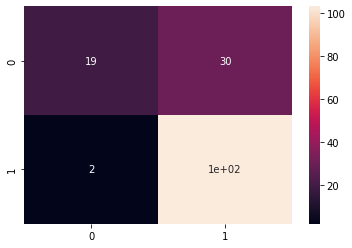

In [39]:
#lets plot the above confusion matrix into a heatmap.
sns.heatmap(cm,annot=True)